# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_6340/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

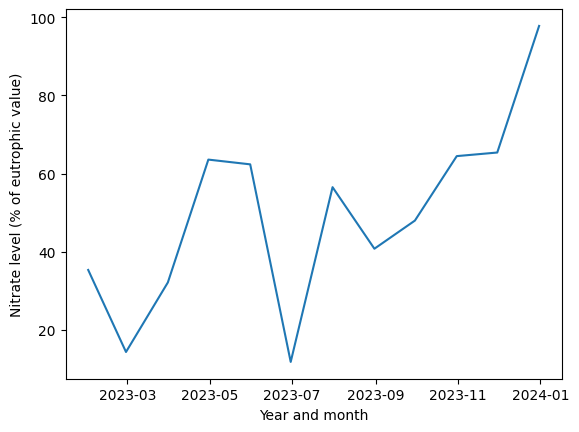

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_6340/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

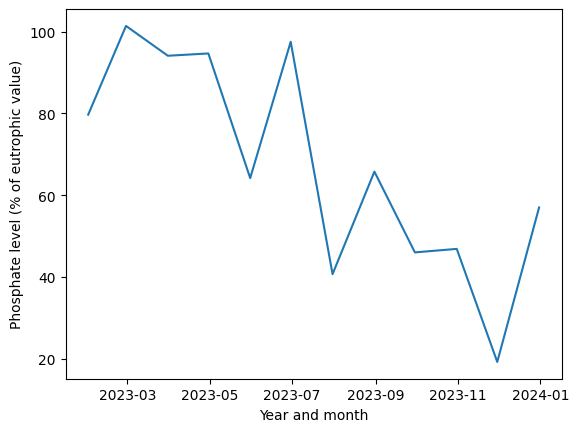

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

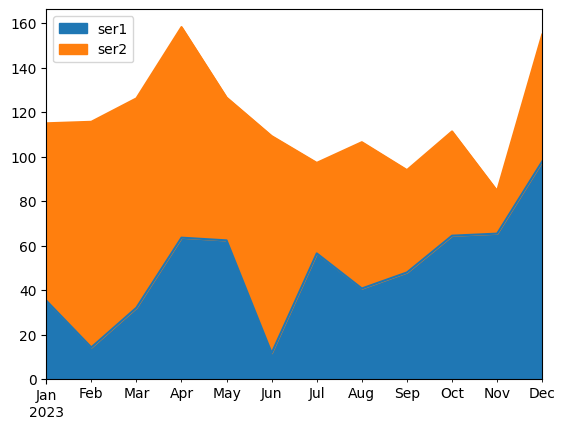

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

The advantage of showing these two graphs as an area plot is that you can see the cumulative percentage of nitrate/phosphate consolidated into one graph. Nitrate levels can be seen independently, but also the corresponding phospate levels can also be accounted for, illustrating the relationship between the two variables. The disadvantage of the area graph is that it is cumulative data, so you cannot investigate the phosphate levels individually if desired since the second series a cumulative represetnation of both nitrate and phosphate levels. The graphs could be adjusted to label data points and highlight certain areas of specific decline or ascent in each graph that are deemed of interest. 

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [2]:
file_path = 'IRENA_RenewableEnergy_Statistics_2000-2022.csv'

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

irena = pd.read_csv(file_path, encoding=result['encoding'])

irena.head()

,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW)
0,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2000,24585.0,5459.01
1,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2001,25781.0,5455.50
2,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2002,26994.0,5891.01
3,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2003,28619.4,6013.24
4,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2004,30312.0,6305.24


In [89]:
irena_numerical = irena.select_dtypes(include=['number'])
irena_categorical = irena.select_dtypes(include=['object'])

In [131]:
irena_numerical.corr()

,M49 code,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW)
M49 code,1.000000,0.006546,0.016382,0.011128
Year,0.006546,1.000000,-0.000913,0.012387
Electricity Generation (GWh),0.016382,-0.000913,1.000000,0.958447
Electricity Installed Capacity (MW),0.011128,0.012387,0.958447,1.000000


<Axes: >

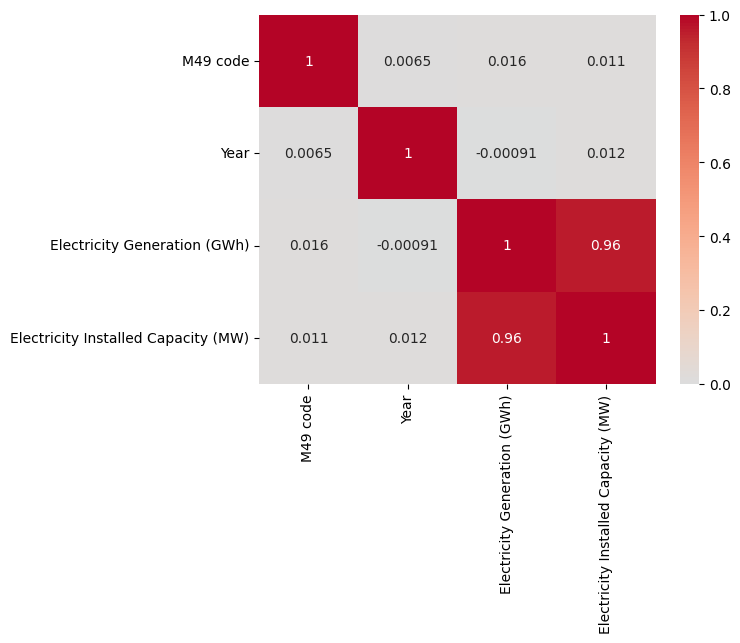

In [132]:
sns.heatmap(irena_numerical.corr(), annot=True, cmap='coolwarm', center=0)

In [3]:
irena_technology = irena.groupby(['Technology', 'Year'])[['Electricity Generation (GWh)', 'Electricity Installed Capacity (MW)']].sum().reset_index()
irena_technology

,Technology,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW)
0,Biogas,2000,13551.415,2862.025
1,Biogas,2001,15029.068,2790.276
2,Biogas,2002,16848.415,3048.951
3,Biogas,2003,19140.315,3504.232
4,Biogas,2004,20402.990,3795.247
...,...,...,...,...
432,Solid biofuels,2018,355719.798,80522.214
433,Solid biofuels,2019,376840.286,83496.043
434,Solid biofuels,2020,394136.916,88253.947
435,Solid biofuels,2021,421417.552,91857.739


In [4]:
irena_technology['Electricity Generation (TWh)'] = irena_technology['Electricity Generation (GWh)'] / 1000

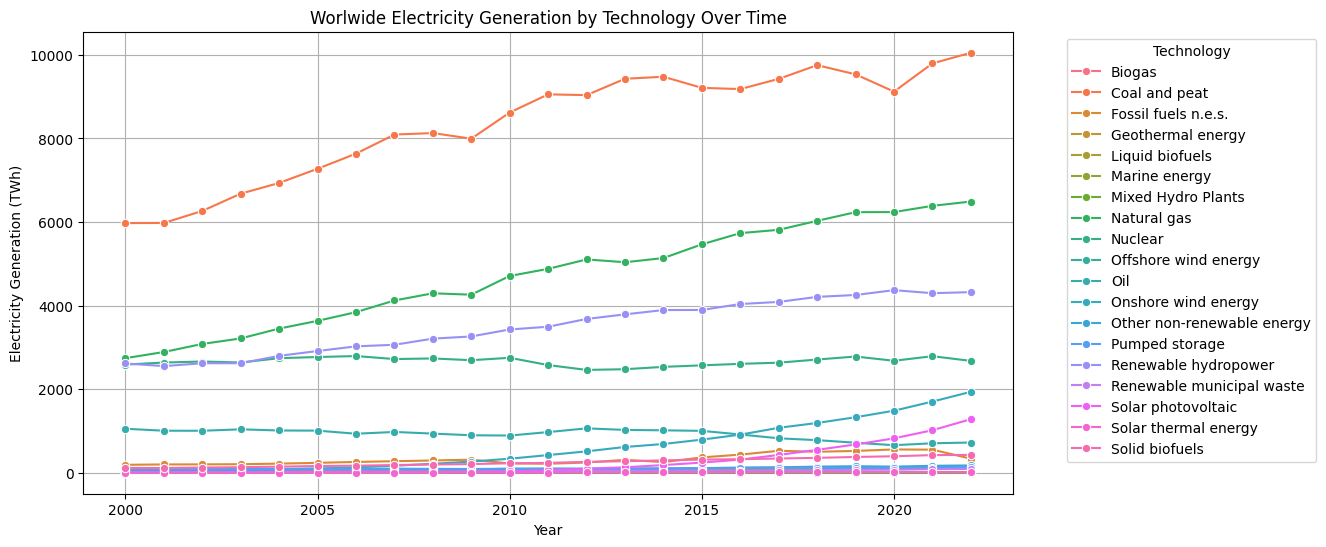

In [108]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=irena_technology, x='Year', y='Electricity Generation (TWh)', hue='Technology', marker='o')

plt.xlabel("Year")
plt.ylabel("Electricity Generation (TWh)")
plt.title("Worlwide Electricity Generation by Technology Over Time")
plt.legend(title="Technology", bbox_to_anchor=(1.05, 1))
plt.grid(True)

plt.show()

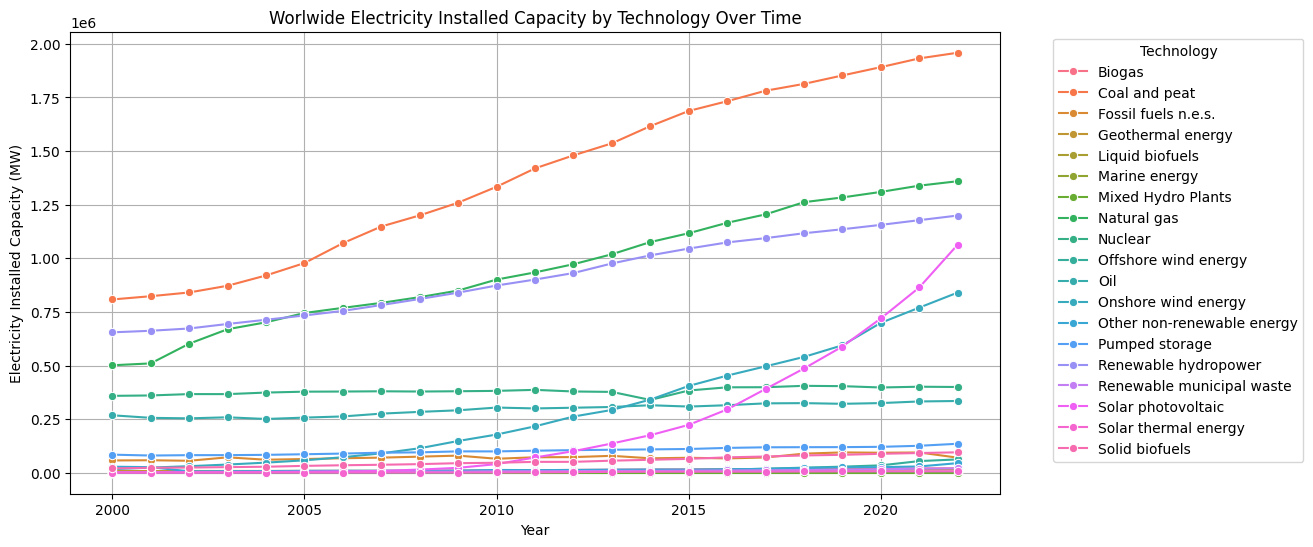

In [110]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=irena_technology, x='Year', y='Electricity Installed Capacity (MW)', hue='Technology', marker='o')

plt.xlabel("Year")
plt.ylabel("Electricity Installed Capacity (MW)")
plt.title("Worlwide Electricity Installed Capacity by Technology Over Time")
plt.legend(title="Technology", bbox_to_anchor=(1.05, 1))
plt.grid(True)

plt.show()

In [124]:
irena_saudi = irena[irena['Country'] == 'Saudi Arabia']
irena_saudi = irena_saudi.groupby(['Group Technology', 'Year'])[['Electricity Generation (GWh)', 'Electricity Installed Capacity (MW)']].sum().reset_index()
irena_saudi['Electricity Generation (TWh)'] = irena_saudi['Electricity Generation (GWh)'] / 1000
irena_saudi.head()

,Group Technology,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Electricity Generation (TWh)
0,Fossil fuels,2000,126191.0,25790.0,126.191
1,Fossil fuels,2001,133673.0,26513.0,133.673
2,Fossil fuels,2002,141736.0,28659.0,141.736
3,Fossil fuels,2003,153000.0,30091.0,153.000
4,Fossil fuels,2004,159875.0,30526.0,159.875


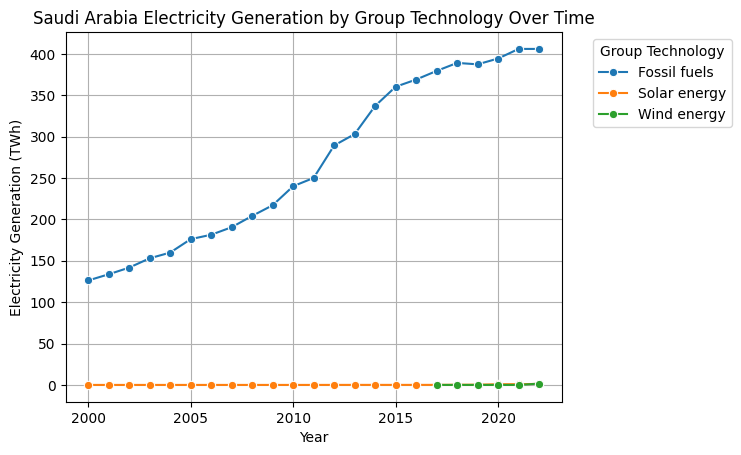

In [125]:
sns.lineplot(data=irena_saudi, x='Year', y='Electricity Generation (TWh)', hue='Group Technology', marker='o')

plt.xlabel("Year")
plt.ylabel("Electricity Generation (TWh)")
plt.title("Saudi Arabia Electricity Generation by Group Technology Over Time")
plt.legend(title="Group Technology", bbox_to_anchor=(1.05, 1))
plt.grid(True)

In [5]:
irena_brazil = irena[irena['Country'] == 'Brazil']
irena_brazil= irena_brazil.groupby(['Group Technology', 'Year'])[['Electricity Generation (GWh)', 'Electricity Installed Capacity (MW)']].sum().reset_index()
irena_brazil['Electricity Generation (TWh)'] = irena_brazil['Electricity Generation (GWh)'] / 1000
irena_brazil.head()

,Group Technology,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Electricity Generation (TWh)
0,Bioenergy,2000,7855.363,2657.146,7.855363
1,Bioenergy,2001,9022.407,2661.447,9.022407
2,Bioenergy,2002,10271.147,2670.049,10.271147
3,Bioenergy,2003,11939.463,2695.856,11.939463
4,Bioenergy,2004,12515.056,3124.000,12.515056


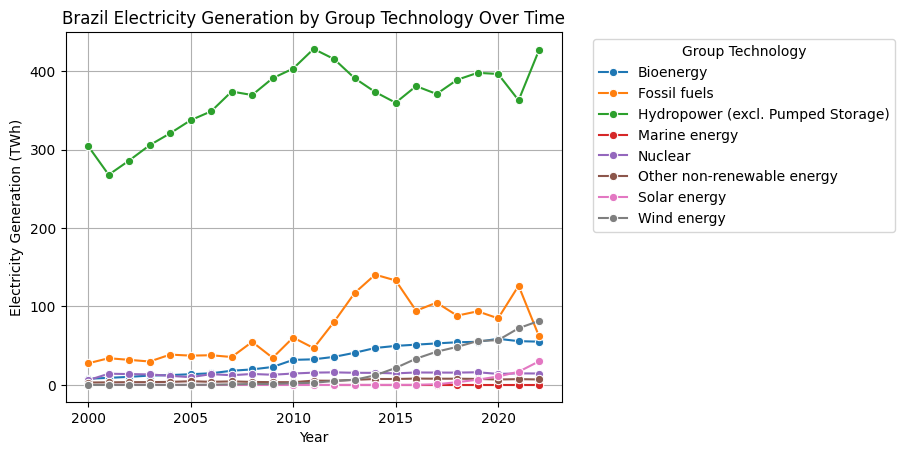

In [6]:
sns.lineplot(data=irena_brazil, x='Year', y='Electricity Generation (TWh)', hue='Group Technology', marker='o')

plt.xlabel("Year")
plt.ylabel("Electricity Generation (TWh)")
plt.title("Brazil Electricity Generation by Group Technology Over Time")
plt.legend(title="Group Technology", bbox_to_anchor=(1.05, 1))
plt.grid(True)

In [44]:
file_path_1 = 'organised_Gen.csv'

with open(file_path_1, 'rb') as f:
    result = chardet.detect(f.read())

us_data = pd.read_csv(file_path_1, encoding=result['encoding'])

us_data

,Unnamed: 0,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0


In [39]:
us_numerical = us_data.select_dtypes(include=['number'])
us_categorical = us_data.select_dtypes(include=['object'])

In [45]:
us_data_adj = us_data.copy()

In [47]:
us_data_adj['Date'] = pd.to_datetime(dict(year=us_data_adj["YEAR"],month=us_data_adj["MONTH"],day=1))
us_data_adj=us_data_adj.set_index("Date")
us_data_adj.drop(columns=["YEAR","MONTH", 'Unnamed: 0'],inplace=True)
us_data_adj

,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
Date,,,,
2001-01-01,AK,Total Electric Power Industry,Coal,46903.0
2001-01-01,AK,Total Electric Power Industry,Petroleum,71085.0
2001-01-01,AK,Total Electric Power Industry,Natural Gas,367521.0
2001-01-01,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
2001-01-01,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...
2022-05-01,WY,"Electric Generators, Electric Utilities",Coal,2071403.0
2022-05-01,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0
2022-05-01,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0


In [55]:
us_producer = us_data_adj.drop(columns=["STATE", "ENERGY SOURCE"])
us_producer_adj = us_producer.groupby(by=['Date', 'TYPE OF PRODUCER']).sum().reset_index()
us_producer_adj

,Date,TYPE OF PRODUCER,GENERATION (Megawatthours)
0,2001-01-01,"Combined Heat and Power, Commercial Power",2.515288e+06
1,2001-01-01,"Combined Heat and Power, Electric Power",5.644103e+07
2,2001-01-01,"Combined Heat and Power, Industrial Power",5.251196e+07
3,2001-01-01,"Electric Generators, Electric Utilities",9.458691e+08
4,2001-01-01,"Electric Generators, Independent Power Producers",2.726353e+08
...,...,...,...
1537,2022-05-01,"Combined Heat and Power, Electric Power",3.957199e+07
1538,2022-05-01,"Combined Heat and Power, Industrial Power",4.536593e+07
1539,2022-05-01,"Electric Generators, Electric Utilities",7.123996e+08
1540,2022-05-01,"Electric Generators, Independent Power Producers",5.724834e+08


In [61]:
us_producer_adj['Generation (TWh)'] = us_producer_adj['GENERATION (Megawatthours)']/1000000
us_producer_adj

,Date,TYPE OF PRODUCER,GENERATION (Megawatthours),Generation (TWh)
0,2001-01-01,"Combined Heat and Power, Commercial Power",2.515288e+06,2.515288
1,2001-01-01,"Combined Heat and Power, Electric Power",5.644103e+07,56.441028
2,2001-01-01,"Combined Heat and Power, Industrial Power",5.251196e+07,52.511956
3,2001-01-01,"Electric Generators, Electric Utilities",9.458691e+08,945.869070
4,2001-01-01,"Electric Generators, Independent Power Producers",2.726353e+08,272.635304
...,...,...,...,...
1537,2022-05-01,"Combined Heat and Power, Electric Power",3.957199e+07,39.571991
1538,2022-05-01,"Combined Heat and Power, Industrial Power",4.536593e+07,45.365934
1539,2022-05-01,"Electric Generators, Electric Utilities",7.123996e+08,712.399597
1540,2022-05-01,"Electric Generators, Independent Power Producers",5.724834e+08,572.483407


Text(0.5, 0, 'Year')

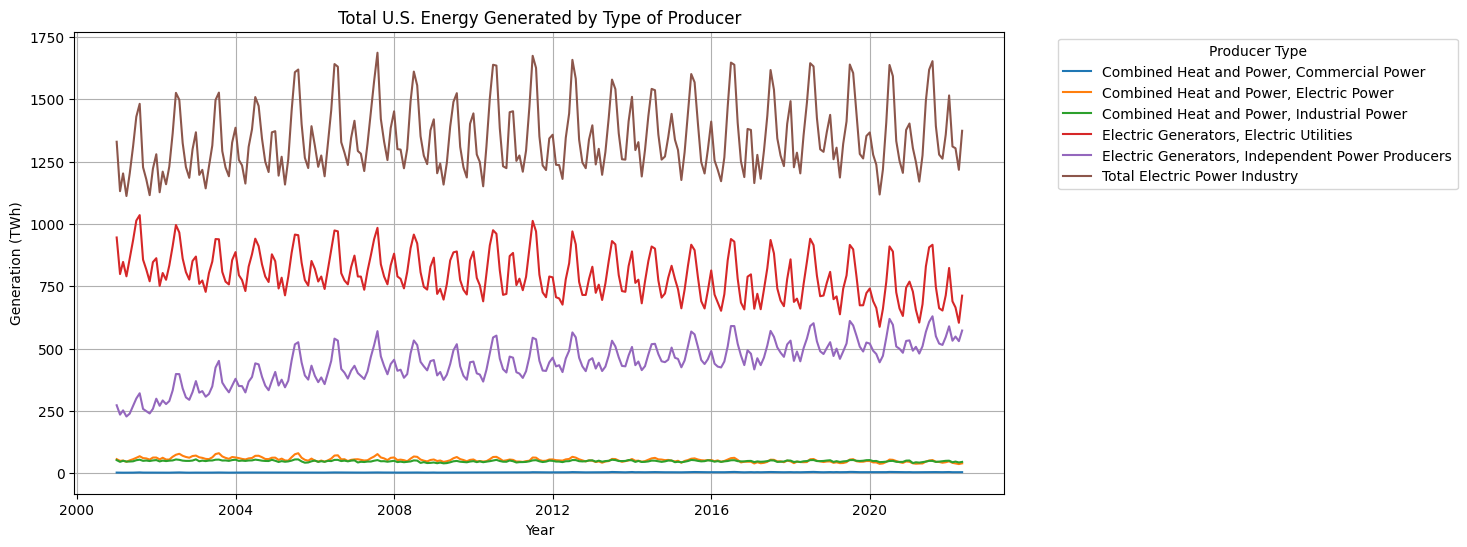

In [104]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=us_producer_adj,
                x="Date",y="Generation (TWh)",hue="TYPE OF PRODUCER")
plt.grid()
plt.title("Total U.S. Energy Generated by Type of Producer")
plt.legend(title="Producer Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Year")

In [73]:
us_source = us_data_adj.drop(columns=["STATE", "TYPE OF PRODUCER"])
us_source_adj = us_source.groupby(by=['Date', 'ENERGY SOURCE']).sum().reset_index()
us_source_adj

,Date,ENERGY SOURCE,GENERATION (Megawatthours)
0,2001-01-01,Coal,7.091484e+08
1,2001-01-01,Geothermal,4.917300e+06
2,2001-01-01,Hydroelectric Conventional,7.540819e+07
3,2001-01-01,Natural Gas,1.695547e+08
4,2001-01-01,Nuclear,2.748283e+08
...,...,...,...
3593,2022-05-01,Pumped Storage,-1.866984e+06
3594,2022-05-01,Solar Thermal and Photovoltaic,6.060448e+07
3595,2022-05-01,Total,1.374009e+09
3596,2022-05-01,Wind,1.675676e+08


In [74]:
us_source_adj['Generation (TWh)'] = us_source_adj['GENERATION (Megawatthours)']/1000000
us_source_adj

,Date,ENERGY SOURCE,GENERATION (Megawatthours),Generation (TWh)
0,2001-01-01,Coal,7.091484e+08,709.148444
1,2001-01-01,Geothermal,4.917300e+06,4.917300
2,2001-01-01,Hydroelectric Conventional,7.540819e+07,75.408194
3,2001-01-01,Natural Gas,1.695547e+08,169.554652
4,2001-01-01,Nuclear,2.748283e+08,274.828308
...,...,...,...,...
3593,2022-05-01,Pumped Storage,-1.866984e+06,-1.866984
3594,2022-05-01,Solar Thermal and Photovoltaic,6.060448e+07,60.604482
3595,2022-05-01,Total,1.374009e+09,1374.008759
3596,2022-05-01,Wind,1.675676e+08,167.567632


Text(0.5, 0, 'Year')

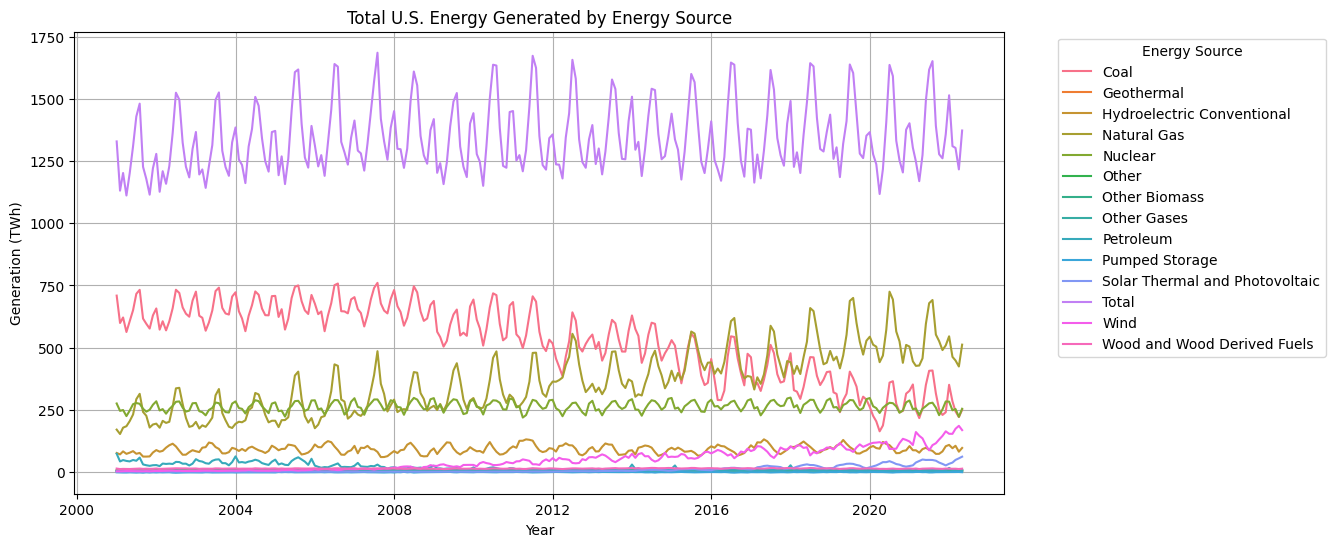

In [105]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=us_source_adj,
                x="Date",y="Generation (TWh)",hue="ENERGY SOURCE")
plt.grid()
plt.title("Total U.S. Energy Generated by Energy Source")
plt.legend(title="Energy Source", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Year")

/var/folders/2r/46mxdql52bn78bp6pr2cps340000gn/T/ipykernel_68673/4172550834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_month["MONTH"]=total_month.index.month
/var/folders/2r/46mxdql52bn78bp6pr2cps340000gn/T/ipykernel_68673/4172550834.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_month["Generation (TWh)"]= total_month["GENERATION (Megawatthours)"]/1000000


Text(0.5, 1.0, 'Total US Energy Generation by Month')

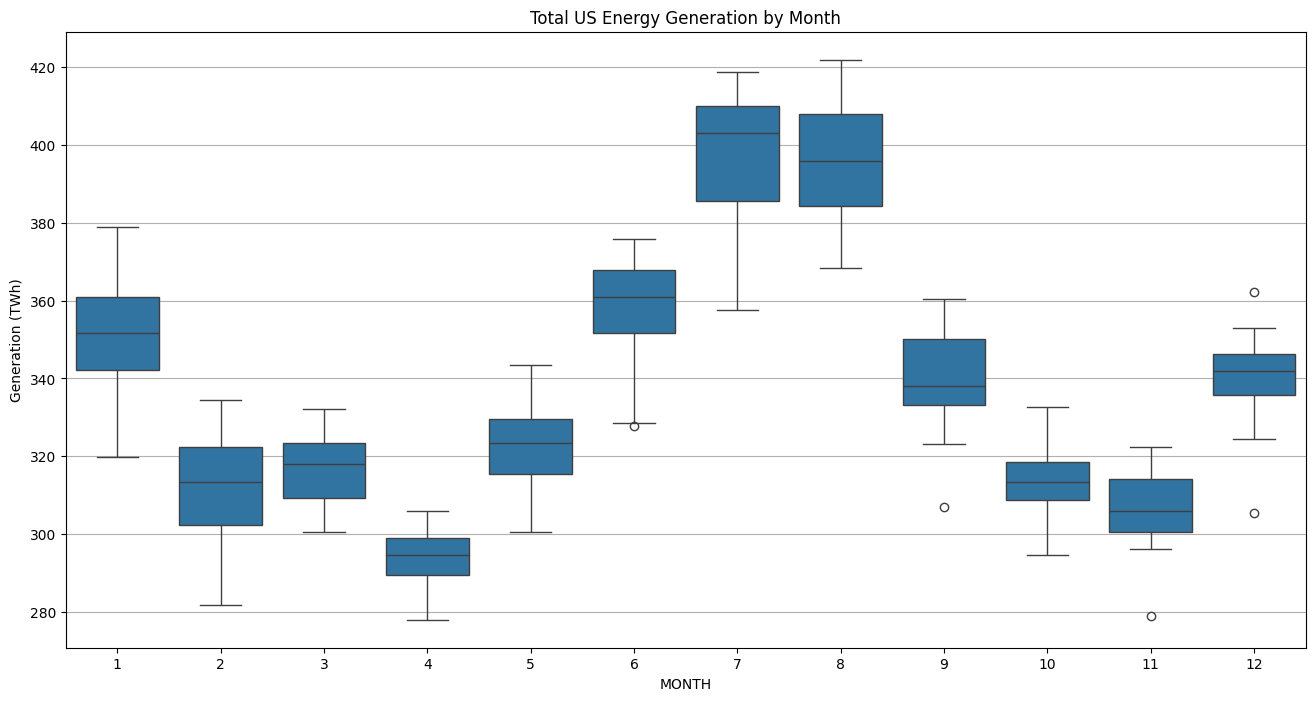

In [107]:
total_month=us_data_adj[(us_data_adj["STATE"]=="US-TOTAL") & (us_data_adj["ENERGY SOURCE"]=="Total") &
                (us_data_adj["TYPE OF PRODUCER"]=="Total Electric Power Industry")]

total_month["MONTH"]=total_month.index.month
total_month["Generation (TWh)"]= total_month["GENERATION (Megawatthours)"]/1000000
plt.figure(figsize=(16, 8))
plt.grid()
sns.boxplot(data=total_month,x="MONTH",y="Generation (TWh)")
plt.title("Total US Energy Generation by Month")

In [6]:
file_path_2 = '02 modern-renewable-energy-consumption.csv'

with open(file_path_2, 'rb') as f:
    result = chardet.detect(f.read())

world_data = pd.read_csv(file_path_2, encoding=result['encoding'])

world_data

,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
0,Africa,NaN,1971,0.16400,0.00000,0.0000,26.013390
1,Africa,NaN,1972,0.16500,0.00000,0.0000,29.633196
2,Africa,NaN,1973,0.17000,0.00000,0.0000,31.345707
3,Africa,NaN,1974,0.17500,0.00000,0.0000,35.667076
4,Africa,NaN,1975,0.17200,0.00000,0.0000,37.717968
...,...,...,...,...,...,...,...
5605,World,OWID_WRL,2017,596.42050,445.46628,1140.3931,4069.982700
5606,World,OWID_WRL,2018,643.03204,576.23090,1269.9792,4183.166500
5607,World,OWID_WRL,2019,674.74536,703.94977,1420.5441,4231.377000
5608,World,OWID_WRL,2020,703.91644,846.22940,1596.4282,4345.990000


In [7]:
world_numerical = world_data.select_dtypes(include=['number'])
world_categorical = world_data.select_dtypes(include=['object'])

In [8]:
world_numerical.corr()

,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
Year,1.000000,0.233277,0.200133,0.236161,0.129447
Geo Biomass Other - TWh,0.233277,1.000000,0.776526,0.887414,0.833035
Solar Generation - TWh,0.200133,0.776526,1.000000,0.944555,0.533798
Wind Generation - TWh,0.236161,0.887414,0.944555,1.000000,0.631043
Hydro Generation - TWh,0.129447,0.833035,0.533798,0.631043,1.000000


<Axes: >

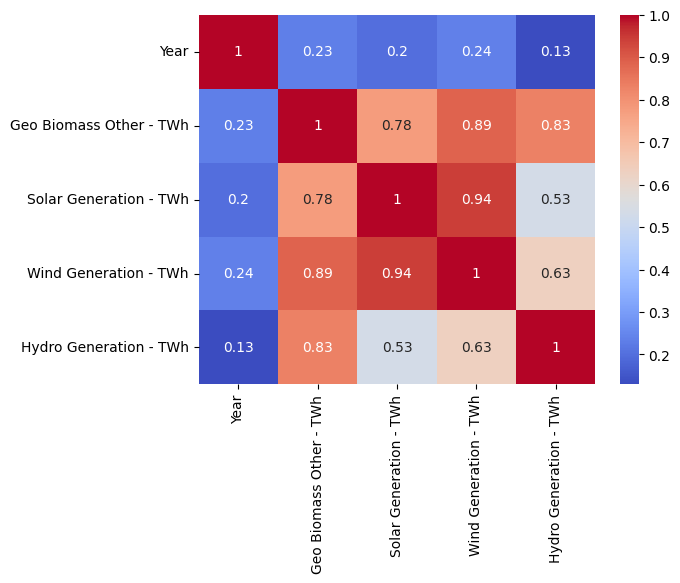

In [9]:
sns.heatmap(world_numerical.corr(), cmap='coolwarm', annot=True)

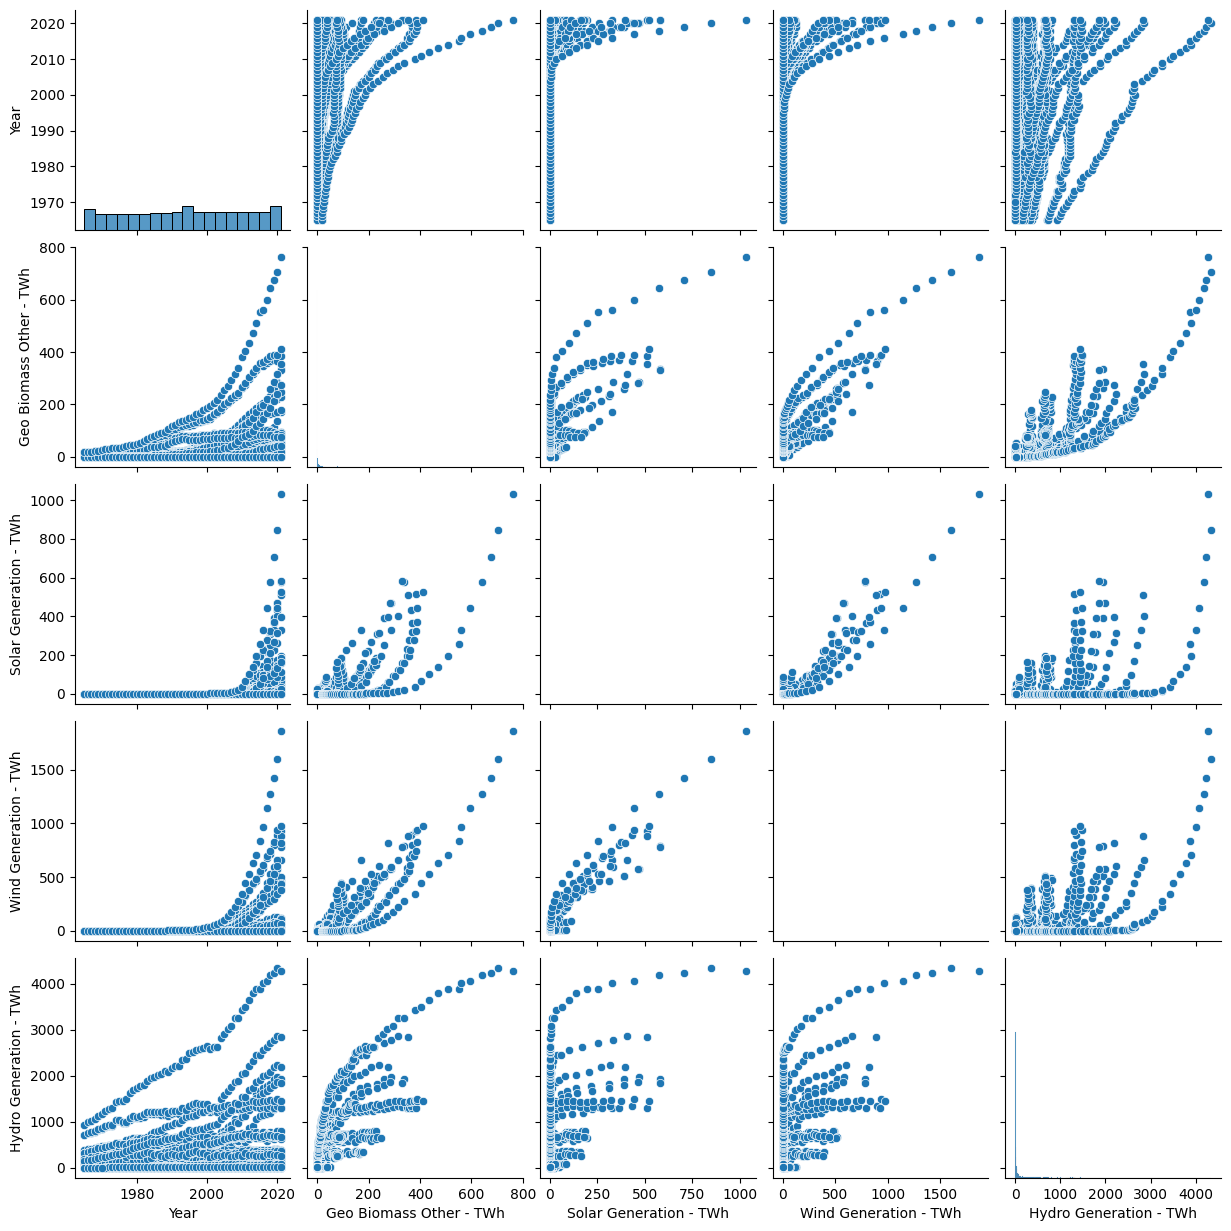

In [10]:
sns.pairplot(world_numerical)

In [17]:
world_cum = world_data[world_data['Entity'] == 'World']
world_cum.head()

,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
5553,World,OWID_WRL,1965,17.985231,0.0,0.0,923.19806
5554,World,OWID_WRL,1966,19.806007,0.0,0.0,983.81696
5555,World,OWID_WRL,1967,19.986570,0.0,0.0,1005.74240
5556,World,OWID_WRL,1968,22.120045,0.0,0.0,1059.28870
5557,World,OWID_WRL,1969,23.257965,0.0,0.0,1121.74240


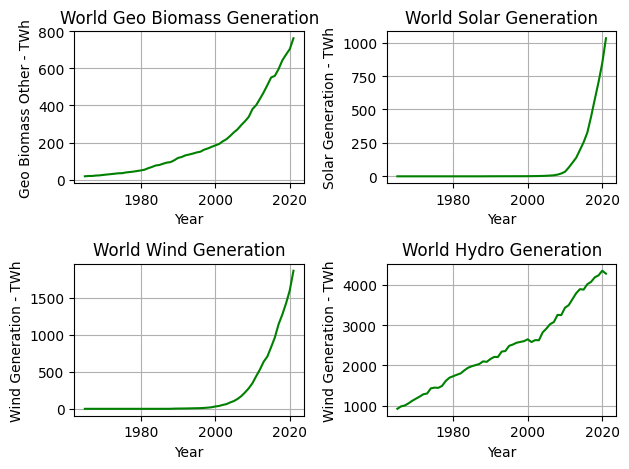

In [134]:
plt.subplot(2,2,1)
plt.plot(world_cum['Year'], world_cum['Geo Biomass Other - TWh'] ,color='green')
plt.xlabel('Year')
plt.ylabel('Geo Biomass Other - TWh')
plt.title('World Geo Biomass Generation')
plt.grid()

plt.subplot(2,2,2)
plt.plot(world_cum['Year'], world_cum['Solar Generation - TWh'], color='green')
plt.xlabel('Year')
plt.ylabel('Solar Generation - TWh')
plt.title('World Solar Generation')
plt.grid()

plt.subplot(2,2,3)
plt.plot(world_cum['Year'], world_cum['Wind Generation - TWh'], color='green')
plt.xlabel('Year')
plt.ylabel('Wind Generation - TWh')
plt.title('World Wind Generation')
plt.grid()

plt.subplot(2,2,4)
plt.plot(world_cum['Year'], world_cum['Hydro Generation - TWh'], color='green')
plt.xlabel('Year')
plt.ylabel('Wind Generation - TWh')
plt.title('World Hydro Generation')
plt.grid()

plt.tight_layout()
plt.show()

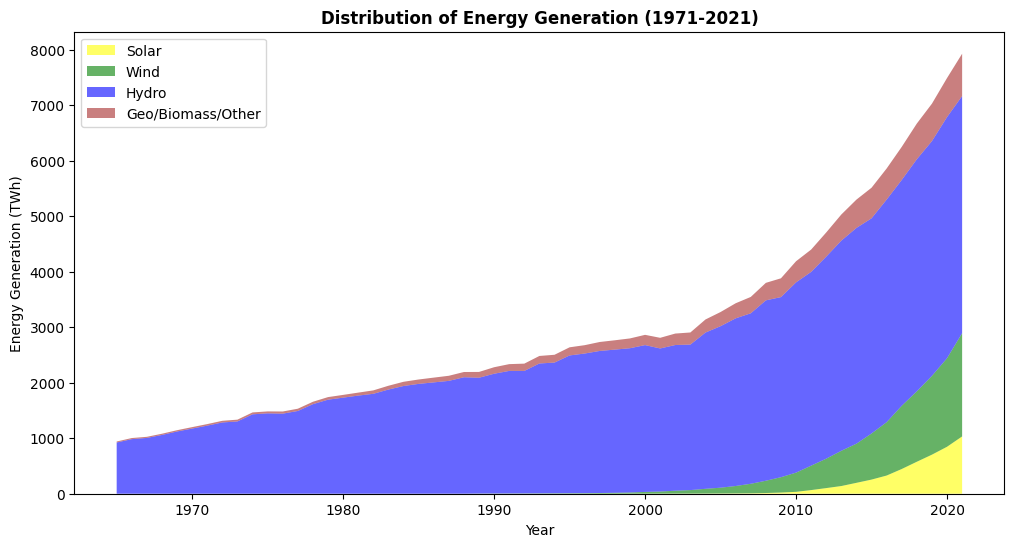

In [136]:
plt.figure(figsize=(12, 6))
plt.stackplot(world_cum['Year'], 
              world_cum['Solar Generation - TWh'], 
              world_cum['Wind Generation - TWh'], 
              world_cum['Hydro Generation - TWh'],
              world_cum['Geo Biomass Other - TWh'], 
              labels=['Solar', 'Wind', 'Hydro', 'Geo/Biomass/Other'], 
              colors=['yellow', 'green', 'blue', 'brown'], 
              alpha=0.6)
plt.title('Distribution of Energy Generation (1971-2021)', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Energy Generation (TWh)')
plt.legend(loc='upper left')
plt.show()

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

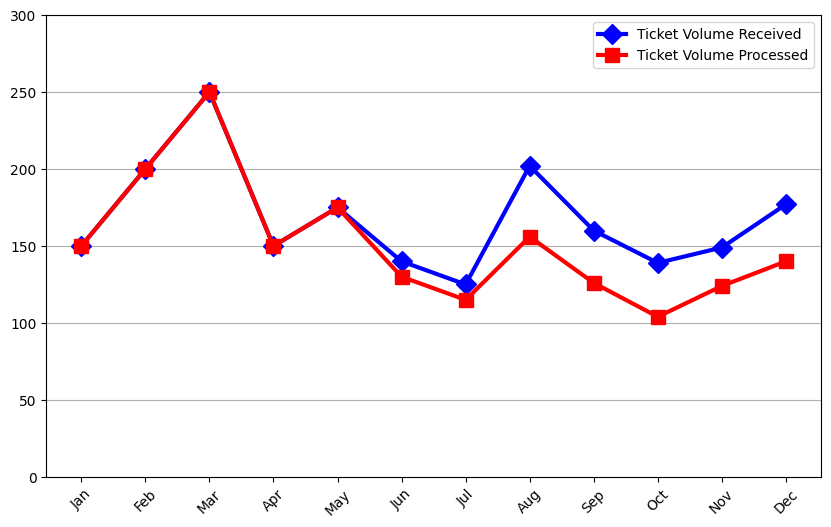

In [ ]:
#Figure 3.17, pp.91

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
received = [150, 200, 250, 150, 175, 140, 125, 202, 160, 139, 149, 177]
processed = [150, 200, 250, 150, 175, 130, 115, 156, 126, 104, 124, 140]

plt.plot(months, received, marker='D', ms=10, label='Ticket Volume Received', color='blue', linewidth=3)
plt.plot(months, processed, marker='s', ms=10, label='Ticket Volume Processed', color='red', linewidth=3)

plt.xticks(rotation=45)
plt.ylim(0, 300)
plt.grid(axis='y')
plt.legend()
plt.show()